In [1]:
import sys
import pandas as pd
sys.path.append('..')
import seaborn as sns
import rbf_functions

In [ ]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [ ]:
paretosets = {}
rbfd= {}
for entry in rbfs:
    rbf = entry.__name__
    rbfd[rbf] = {}
    data = pd.read_csv(f"./refsets/{rbf}_refset.csv")
    paretosets[rbf] = data
df_global = pd.read_csv(f"./refsets/global_refset.csv")

In [ ]:
for rbf in paretosets:
    print(f"{rbf}: {len(paretosets[rbf])}")

# Contribution to global reference set

In [ ]:
l_global = df_global.values.tolist()
contribution = {}
templ = []
for rbf in paretosets:
    x=0
    for solution in paretosets[rbf].values.tolist():
        if solution in l_global:
            templ.append(solution)
            x +=1
    contribution[rbf] = round(x/len(df_global), 3)
    rbfd[rbf] = pd.DataFrame(templ, columns=data.columns)
    templ = []
contribution

In [6]:
#https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

# pd.DataFrame.from_dict(rbfd, 'columns')
for k, v in rbfd.items():
    v['rbf'] = k

combined = pd.concat(rbfd.values())
combined.reset_index(inplace=True, drop=True)

In [7]:
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,74.839081,0.666993,0.416420,0.655389,0.078247,1.0,original_rbf
1,77.714269,0.516168,0.344165,0.420679,0.077796,1.0,original_rbf
2,80.557980,0.976265,0.599020,0.870355,0.092643,1.0,original_rbf
3,78.513667,0.995211,0.736930,0.849365,0.088143,1.0,original_rbf
4,80.094900,0.925179,0.752447,0.875701,0.090004,1.0,original_rbf


/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/jhkwakkel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: No cont

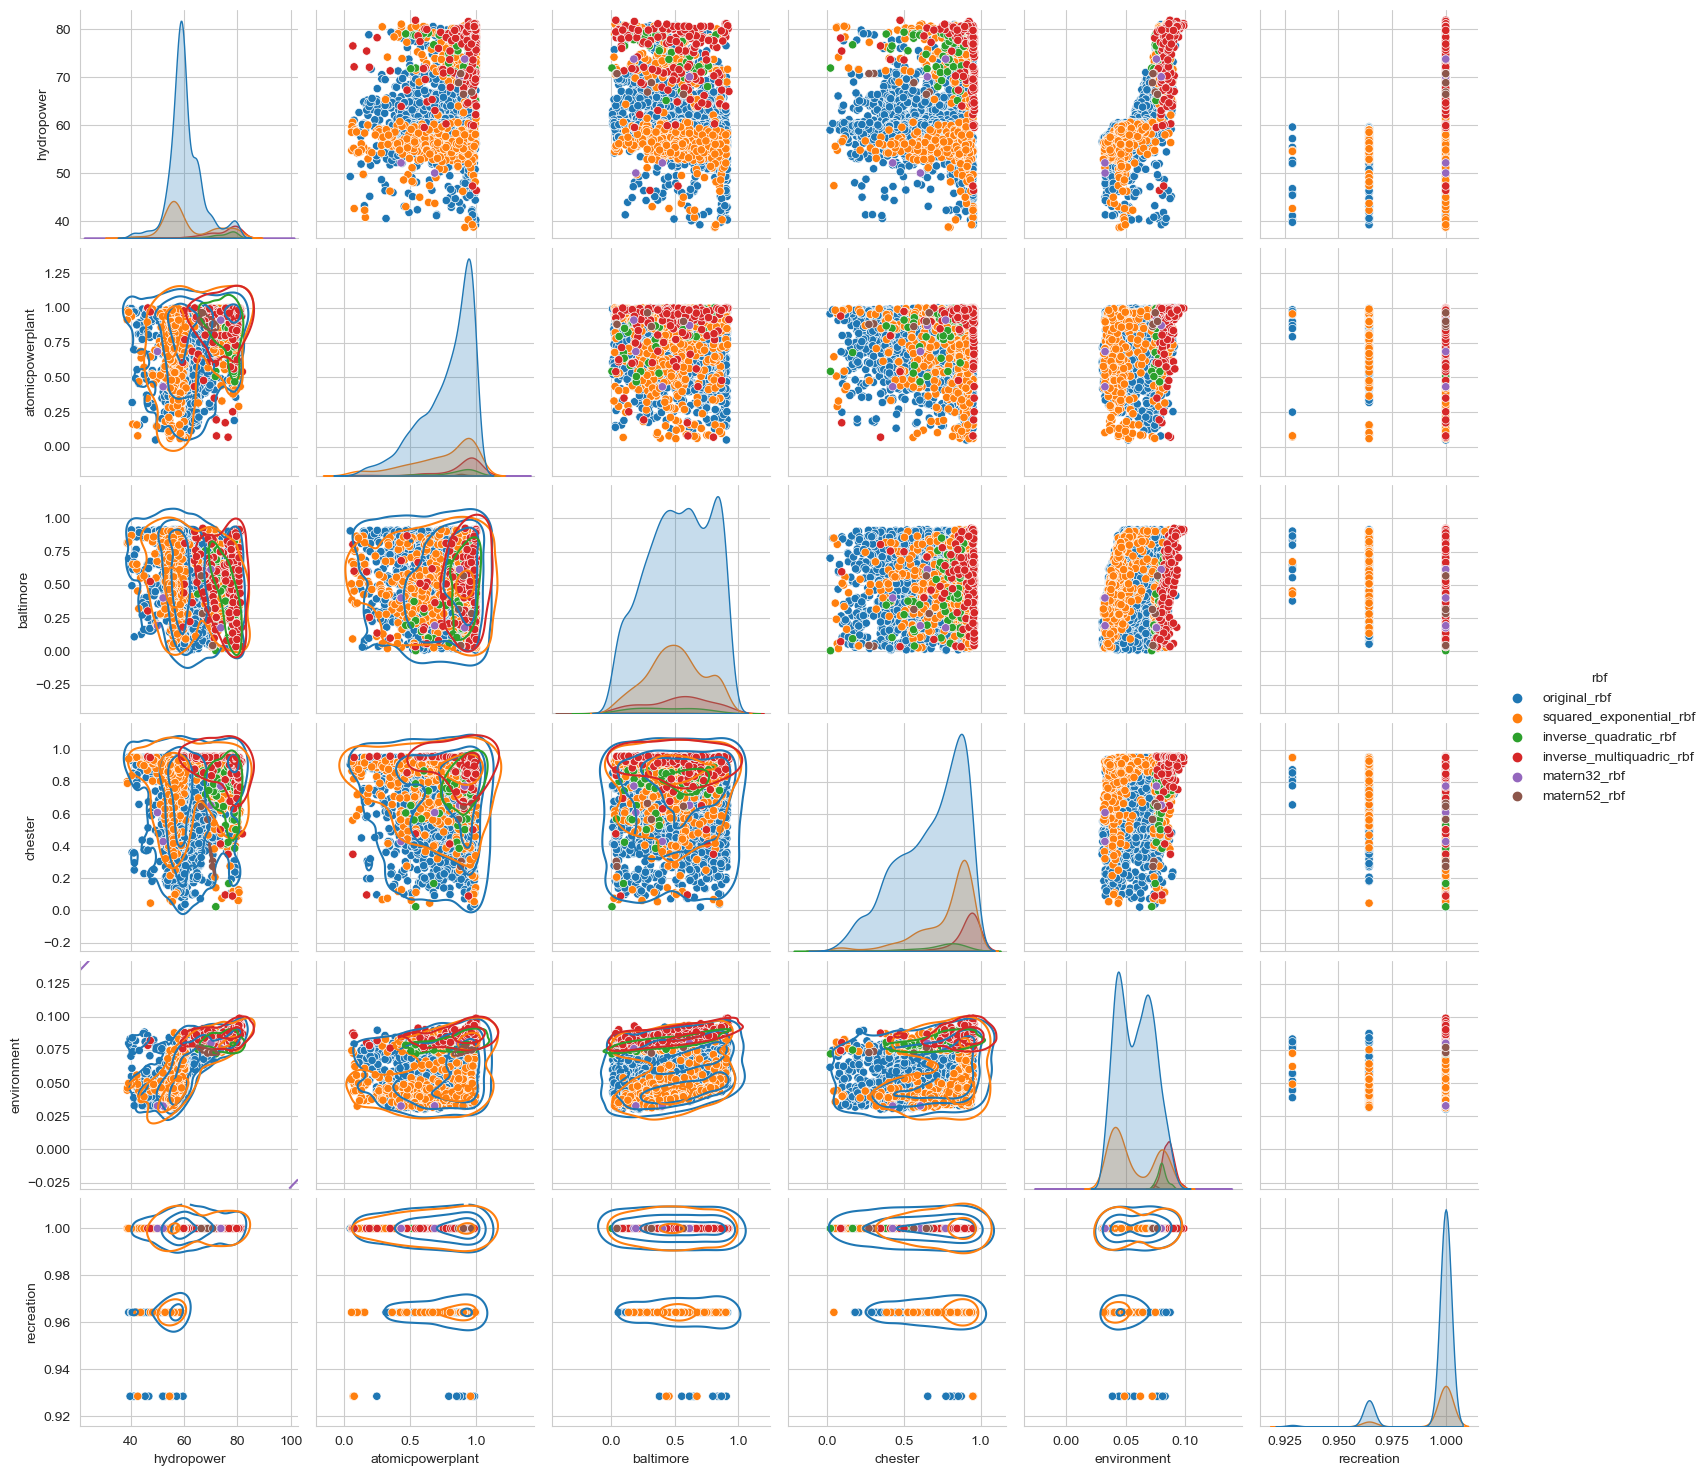

In [8]:
p = sns.pairplot(combined, hue="rbf")
p.map_lower(sns.kdeplot, levels=4, color=".2", warn_singular=False)